#Installing Library

Input ChEMBL database

In [1]:
! pip install chembl_webresource_client

     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.2-cp36-none-any.whl size=55662 sha256=a175874db84d5ca5cd17e98f24b281677320c608c9cfeb6f9a233be3849e09e6
  Stored in directory: /root/.cache/pip/wheels/e6/96/19/3f042bfda7c669bfe24c8278477f57b0fbbf3e488b4c09e3a8
Successfully built chembl-webresource-client


In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

#Select p300 in ChEMBL

In [3]:
# Target search for p300
target = new_client.target
target_query = target.search('p300')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Neurogenic locus notch homolog protein 1,27.0,False,CHEMBL4295799,"[{'accession': 'Q01705', 'component_descriptio...",SINGLE PROTEIN,10090
1,"[{'xref_id': 'Q09472', 'xref_name': None, 'xre...",Homo sapiens,Histone acetyltransferase p300,21.0,False,CHEMBL3784,"[{'accession': 'Q09472', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,CREB-binding protein/Histone acetyltransferase...,20.0,False,CHEMBL3883300,"[{'accession': 'Q09472', 'component_descriptio...",PROTEIN FAMILY,9606
3,[],Homo sapiens,Histone acetyltransferase p300/Hypoxia-inducib...,17.0,False,CHEMBL3885588,"[{'accession': 'Q09472', 'component_descriptio...",PROTEIN COMPLEX,9606
4,[],Homo sapiens,HIF1A/p300/CREB-binding protein,17.0,False,CHEMBL4296108,"[{'accession': 'Q09472', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,"[{'xref_id': 'Q92831', 'xref_name': None, 'xre...",Homo sapiens,Histone acetyltransferase PCAF,10.0,False,CHEMBL5500,"[{'accession': 'Q92831', 'component_descriptio...",SINGLE PROTEIN,9606
6,[],Homo sapiens,Histone acetyltransferase KAT2A/KAT2B,7.0,False,CHEMBL3885587,"[{'accession': 'Q92831', 'component_descriptio...",PROTEIN FAMILY,9606


#Select and retrive inhibitor

In [4]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL3784'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1831662,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL222543,None,CHEMBL222543,None,False,http://www.openphacts.org/units/Nanomolar,628114,=,1,True,=,None,IC50,nM,None,168000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,168.0
1,None,1831663,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL129148,None,CHEMBL129148,None,False,http://www.openphacts.org/units/Nanomolar,628113,=,1,True,=,None,IC50,nM,None,233000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,233.0
2,None,1831664,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '9.61', 'le': '0.24', 'lle': '-0.88', ...",CHEMBL221782,None,CHEMBL221782,4.48,False,http://www.openphacts.org/units/Nanomolar,628112,=,1,True,=,None,IC50,nM,None,33000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,33.0
3,None,1832019,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '12.74', 'le': '0.24', 'lle': '1.09', ...",CHEMBL129964,None,CHEMBL129964,4.34,False,http://www.openphacts.org/units/Nanomolar,628110,=,1,True,=,None,IC50,nM,None,46000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,46.0
4,None,1832020,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '11.80', 'le': '0.22', 'lle': '1.45', ...",CHEMBL222573,None,CHEMBL222573,4.68,False,http://www.openphacts.org/units/Nanomolar,628111,=,1,True,=,None,IC50,nM,None,21000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,None,18777023,[],CHEMBL4269217,Inhibition of recombinant full-length His6-tag...,B,BAO_0000190,BAO_0000219,cell-based format,C=C(C)[C@H](CC=C(C)C)C[C@]12C[C@H](CC=C(C)C)C(...,None,None,CHEMBL4265983,Bioorg Med Chem,2018,"{'bei': '8.55', 'le': '0.16', 'lle': '-3.76', ...",CHEMBL445599,None,CHEMBL445599,5.16,True,http://www.openphacts.org/units/Nanomolar,3119901,=,1,True,=,None,IC50,nM,None,7000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,7.0
185,None,18777025,[],CHEMBL4269219,Inhibition of recombinant His6-tagged human P3...,B,BAO_0000190,BAO_0000219,cell-based format,CCCCCCCCCCCCCCCc1cccc(O)

##Save to CSV file

In [8]:
df.to_csv('p300_01_bioactivity_data_raw.csv', index=False)

#Handling Missing data

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1831662,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL222543,None,CHEMBL222543,None,False,http://www.openphacts.org/units/Nanomolar,628114,=,1,True,=,None,IC50,nM,None,168000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,168.0
1,None,1831663,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL129148,None,CHEMBL129148,None,False,http://www.openphacts.org/units/Nanomolar,628113,=,1,True,=,None,IC50,nM,None,233000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,233.0
2,None,1831664,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '9.61', 'le': '0.24', 'lle': '-0.88', ...",CHEMBL221782,None,CHEMBL221782,4.48,False,http://www.openphacts.org/units/Nanomolar,628112,=,1,True,=,None,IC50,nM,None,33000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,33.0
3,None,1832019,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '12.74', 'le': '0.24', 'lle': '1.09', ...",CHEMBL129964,None,CHEMBL129964,4.34,False,http://www.openphacts.org/units/Nanomolar,628110,=,1,True,=,None,IC50,nM,None,46000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,46.0
4,None,1832020,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '11.80', 'le': '0.22', 'lle': '1.45', ...",CHEMBL222573,None,CHEMBL222573,4.68,False,http://www.openphacts.org/units/Nanomolar,628111,=,1,True,=,None,IC50,nM,None,21000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,None,18777023,[],CHEMBL4269217,Inhibition of recombinant full-length His6-tag...,B,BAO_0000190,BAO_0000219,cell-based format,C=C(C)[C@H](CC=C(C)C)C[C@]12C[C@H](CC=C(C)C)C(...,None,None,CHEMBL4265983,Bioorg Med Chem,2018,"{'bei': '8.55', 'le': '0.16', 'lle': '-3.76', ...",CHEMBL445599,None,CHEMBL445599,5.16,True,http://www.openphacts.org/units/Nanomolar,3119901,=,1,True,=,None,IC50,nM,None,7000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,7.0
185,None,18777025,[],CHEMBL4269219,Inhibition of recombinant His6-tagged human P3...,B,BAO_0000190,BAO_0000219,cell-based format,CCCCCCCCCCCCCCCc1cccc(O)

In [10]:
len(df2.canonical_smiles.unique())

148

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1831662,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL222543,None,CHEMBL222543,None,False,http://www.openphacts.org/units/Nanomolar,628114,=,1,True,=,None,IC50,nM,None,168000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,168.0
1,None,1831663,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL129148,None,CHEMBL129148,None,False,http://www.openphacts.org/units/Nanomolar,628113,=,1,True,=,None,IC50,nM,None,233000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,233.0
2,None,1831664,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '9.61', 'le': '0.24', 'lle': '-0.88', ...",CHEMBL221782,None,CHEMBL221782,4.48,False,http://www.openphacts.org/units/Nanomolar,628112,=,1,True,=,None,IC50,nM,None,33000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,33.0
3,None,1832019,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '12.74', 'le': '0.24', 'lle': '1.09', ...",CHEMBL129964,None,CHEMBL129964,4.34,False,http://www.openphacts.org/units/Nanomolar,628110,=,1,True,=,None,IC50,nM,None,46000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,46.0
4,None,1832020,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '11.80', 'le': '0.22', 'lle': '1.45', ...",CHEMBL222573,None,CHEMBL222573,4.68,False,http://www.openphacts.org/units/Nanomolar,628111,=,1,True,=,None,IC50,nM,None,21000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,None,18776973,[],CHEMBL4269181,Inhibition of p300 (unknown origin) using huma...,B,BAO_0000190,BAO_0000357,single protein format,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,None,None,CHEMBL4265983,Bioorg Med Chem,2018,None,CHEMBL2203537,None,CHEMBL2203537,None,False,http://www.openphacts.org/units/Nanomolar,3119893,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,50.0
180,None,18776974,[],CHEMBL4269181,Inhibition of p300 (unknown origin) using huma...,B,BAO_0000190,BAO_0000357,single protein format,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,None,None,CHEMBL4265983,Bi

#Data Pre-processing

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,168000.0
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,233000.0
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,33000.0
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,46000.0
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,21000.0
...,...,...,...
179,CHEMBL2203537,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,50000.0
180,CHEMBL4277382,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,14000.0
181,CHEMBL4287521,CN1C(=O)/C(=C/c2ccc(N3CCOCC3)o2)C(=O)NC1=S,50000.0
182,CHEMBL4277102,Cc1ccc(N2C(=O)/C(=C\C=C\c3ccco3)C(=O)NC2=S)cc1Cl,700.0


##Save to CSV file

In [13]:
df3.to_csv('p300_02_bioactivity_data_preprocessed.csv', index=False)

#Labeling compounds as either being active, inactive or intermediate
<1000 nM active, >1000 nM inactive


In [14]:
df4 = pd.read_csv('p300_02_bioactivity_data_preprocessed.csv')

In [15]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,168000.0,inactive
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,233000.0,inactive
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,33000.0,inactive
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,46000.0,inactive
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,21000.0,inactive
...,...,...,...,...
143,CHEMBL2203537,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,50000.0,inactive
144,CHEMBL4277382,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,14000.0,inactive
145,CHEMBL4287521,CN1C(=O)/C(=C/c2ccc(N3CCOCC3)o2)C(=O)NC1=S,50000.0,inactive
146,CHEMBL4277102,Cc1ccc(N2C(=O)/C(=C\C=C\c3ccco3)C(=O)NC2=S)cc1Cl,700.0,active


#Save to CSV

In [17]:
df5.to_csv('p300_03_bioactivity_data_preprocessed.csv', index=False)

#Install Conda and Rdkit

In [18]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-11-08 01:04:53--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  31.6MB/s    in 2.6s    

2020-11-08 01:04:56 (31.6 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37

In [19]:
df6 = pd.read_csv('p300_03_bioactivity_data_preprocessed.csv')

In [20]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [21]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [22]:
df_lipinski = lipinski(df6.canonical_smiles)

#Combine data frame

In [23]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,394.379,3.71420,4.0,5.0
1,338.359,3.72900,4.0,5.0
2,466.125,5.36040,3.0,4.0
3,340.331,3.24660,5.0,6.0
4,396.351,3.23180,5.0,6.0
...,...,...,...,...
143,285.328,1.42440,2.0,3.0
144,277.349,0.89844,1.0,4.0
145,321.358,0.37270,1.0,6.0
146,372.833,3.62892,1.0,4.0


In [24]:
df6

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,168000.0,inactive
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,233000.0,inactive
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,33000.0,inactive
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,46000.0,inactive
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,21000.0,inactive
...,...,...,...,...
143,CHEMBL2203537,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,50000.0,inactive
144,CHEMBL4277382,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,14000.0,inactive
145,CHEMBL4287521,CN1C(=O)/C(=C/c2ccc(N3CCOCC3)o2)C(=O)NC1=S,50000.0,inactive
146,CHEMBL4277102,Cc1ccc(N2C(=O)/C(=C\C=C\c3ccco3)C(=O)NC2=S)cc1Cl,700.0,active


In [25]:
df_combined = pd.concat([df6,df_lipinski], axis=1)

In [26]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,168000.0,inactive,394.379,3.71420,4.0,5.0
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,233000.0,inactive,338.359,3.72900,4.0,5.0
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,33000.0,inactive,466.125,5.36040,3.0,4.0
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,46000.0,inactive,340.331,3.24660,5.0,6.0
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,21000.0,inactive,396.351,3.23180,5.0,6.0
...,...,...,...,...,...,...,...,...
143,CHEMBL2203537,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,50000.0,inactive,285.328,1.42440,2.0,3.0
144,CHEMBL4277382,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,14000.0,inactive,277.349,0.89844,1.0,4.0
145,CHEMBL4287521,CN1C(=O)/C(=C/c2ccc(N3CCOCC3)o2)C(=O)NC1=S,50000.0,inactive,321.358,0.37270,1.0,6.0
146,CHEMBL4277102,Cc1ccc(N2C(=O)/C(=C\C=C\c3ccco3)C(=O)NC2=S)cc1Cl,700.0,active,372.833,3.62892,1.0,4.0


#Convert IC50 to pIC50

In [27]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [28]:
df_combined.standard_value.describe()

count       148.000000
mean      30282.420811
std       70991.225621
min           1.200000
25%        2175.000000
50%        5335.000000
75%       14600.000000
max      500000.000000
Name: standard_value, dtype: float64

In [29]:
-np.log10( (10**-9)* 100000000 )

1.0

In [30]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [31]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [32]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,inactive,394.379,3.71420,4.0,5.0,168000.0
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,inactive,338.359,3.72900,4.0,5.0,233000.0
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,inactive,466.125,5.36040,3.0,4.0,33000.0
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,inactive,340.331,3.24660,5.0,6.0,46000.0
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,inactive,396.351,3.23180,5.0,6.0,21000.0
...,...,...,...,...,...,...,...,...
143,CHEMBL2203537,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,inactive,285.328,1.42440,2.0,3.0,50000.0
144,CHEMBL4277382,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,inactive,277.349,0.89844,1.0,4.0,14000.0
145,CHEMBL4287521,CN1C(=O)/C(=C/c2ccc(N3CCOCC3)o2)C(=O)NC1=S,inactive,321.358,0.37270,1.0,6.0,50000.0
146,CHEMBL4277102,Cc1ccc(N2C(=O)/C(=C\C=C\c3ccco3)C(=O)NC2=S)cc1Cl,active,372.833,3.62892,1.0,4.0,700.0


In [33]:
df_norm.standard_value_norm.describe()

count       148.000000
mean      30282.420811
std       70991.225621
min           1.200000
25%        2175.000000
50%        5335.000000
75%       14600.000000
max      500000.000000
Name: standard_value_norm, dtype: float64

In [34]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,inactive,394.379,3.71420,4.0,5.0,3.774691
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,inactive,338.359,3.72900,4.0,5.0,3.632644
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,inactive,466.125,5.36040,3.0,4.0,4.481486
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,inactive,340.331,3.24660,5.0,6.0,4.337242
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,inactive,396.351,3.23180,5.0,6.0,4.677781
...,...,...,...,...,...,...,...,...
143,CHEMBL2203537,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,inactive,285.328,1.42440,2.0,3.0,4.301030
144,CHEMBL4277382,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,inactive,277.349,0.89844,1.0,4.0,4.853872
145,CHEMBL4287521,CN1C(=O)/C(=C/c2ccc(N3CCOCC3)o2)C(=O)NC1=S,inactive,321.358,0.37270,1.0,6.0,4.301030
146,CHEMBL4277102,Cc1ccc(N2C(=O)/C(=C\C=C\c3ccco3)C(=O)NC2=S)cc1Cl,active,372.833,3.62892,1.0,4.0,6.154902


Chemical Space Analysis

In [35]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

##Frequency Plot

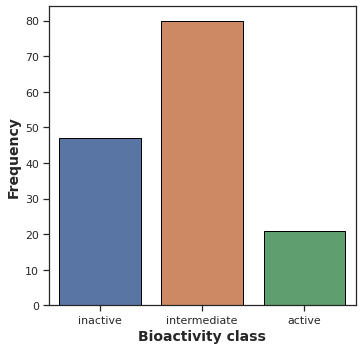

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Scatter Plot MW vs LogP

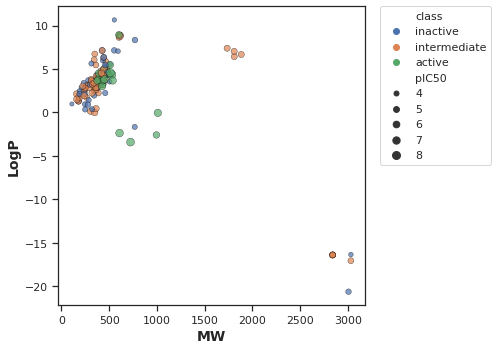

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

#ML Random Forest

In [38]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [47]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2020-11-08 01:13:18--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2020-11-08 01:13:18--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  79.4MB/s    in 0.3s    

2020-11-08 01:13:19 (79.4 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2020-11-08 01:13:19--  https://github

In [48]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

##Input Features

In [51]:
X = df_final.drop('pIC50', axis=1)
X

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,inactive,394.379,3.71420,4.0,5.0
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,inactive,338.359,3.72900,4.0,5.0
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,inactive,466.125,5.36040,3.0,4.0
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,inactive,340.331,3.24660,5.0,6.0
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,inactive,396.351,3.23180,5.0,6.0
...,...,...,...,...,...,...,...
143,CHEMBL2203537,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,inactive,285.328,1.42440,2.0,3.0
144,CHEMBL4277382,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,inactive,277.349,0.89844,1.0,4.0
145,CHEMBL4287521,CN1C(=O)/C(=C/c2ccc(N3CCOCC3)o2)C(=O)NC1=S,inactive,321.358,0.37270,1.0,6.0
146,CHEMBL4277102,Cc1ccc(N2C(=O)/C(=C\C=C\c3ccco3)C(=O)NC2=S)cc1Cl,active,372.833,3.62892,1.0,4.0


In [57]:
selection = ['canonical_smiles','molecule_chembl_id','pIC50']
df_final_selection = df_final[selection]
df_final_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [58]:
! cat molecule.smi | head -5

O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O)c(C(=O)O)c1	CHEMBL222543	3.774690718274137
O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1	CHEMBL129148	3.632644078973981
O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c(Br)c1	CHEMBL221782	4.481486060122112
O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(O)c1	CHEMBL129964	4.337242168318426
O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc(O)c(C(=O)O)c1	CHEMBL222573	4.6777807052660805


In [59]:
! cat molecule.smi | wc -l

148


##Calculate Fingerprint Descriptor

In [60]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [61]:
! bash padel.sh

Processing CHEMBL222543	3.774690718274137 in molecule.smi (1/148). 
Processing CHEMBL129148	3.632644078973981 in molecule.smi (2/148). 
Processing CHEMBL221782	4.481486060122112 in molecule.smi (3/148). Average speed: 3.30 s/mol.
Processing CHEMBL129964	4.337242168318426 in molecule.smi (4/148). Average speed: 1.83 s/mol.
Processing CHEMBL222573	4.6777807052660805 in molecule.smi (5/148). Average speed: 1.43 s/mol.
Processing CHEMBL222328	5.301029995663981 in molecule.smi (6/148). Average speed: 1.12 s/mol.
Processing CHEMBL17205	3.9546770212133424 in molecule.smi (7/148). Average speed: 1.09 s/mol.
Processing CHEMBL116438	3.3979400086720375 in molecule.smi (8/148). Average speed: 0.95 s/mol.
Processing CHEMBL455368	5.301029995663981 in molecule.smi (9/148). Average speed: 1.00 s/mol.
Processing CHEMBL502489	5.221848749616356 in molecule.smi (10/148). Average speed: 0.88 s/mol.
Processing CHEMBL99594	4.638272163982407 in molecule.smi (11/148). Average speed: 0.88 s/mol.
Processing CHEM

In [62]:
! ls -l

total 108744
-rw-r--r-- 1 root root   277070 Nov  8 01:21 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Nov  8 01:13 __MACOSX
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    16250 Nov  8 01:20 molecule.smi
-rw-r--r-- 1 root root   114299 Nov  8 01:04 p300_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root    14747 Nov  8 01:04 p300_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root    16363 Nov  8 01:04 p300_03_bioactivity_data_preprocessed.csv
drwxrwxr-x 4 root root     4096 May 30 10:10 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Nov  8 01:13 padel.sh
-rw-r--r-- 1 root root 25768637 Nov  8 01:13 padel.zip
-rw-r--r-- 1 root root    15986 Nov  8 01:06 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    41652 Nov  8 01:06 plot_MW_vs_LogP.pdf
drwxr-xr-x 1 root root     4096 Oct 28 16:30 sample_data


##Preparing Data Matrices

###X matrices

In [63]:
df_final_X = pd.read_csv('descriptors_output.csv')

In [64]:
df_final_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL129148\t3.632644078973981,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL222543\t3.774690718274137,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL221782\t4.481486060122112,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL129964\t4.337242168318426,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL222573\t4.6777807052660805,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,CHEMBL4277382\t4.853871964321762,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144,CHEMBL2203537\t4.301029995663981,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,CHEMBL4287521\t4.301029995663981,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,CHEMBL4277102\t6.154901959985743,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
df_final_X = df_final_X.drop(columns=['Name'])
df_final_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Y Variable

In [67]:
df_final_Y = df_final['pIC50']
df_final_Y

0      3.774691
1      3.632644
2      4.481486
3      4.337242
4      4.677781
         ...   
143    4.301030
144    4.853872
145    4.301030
146    6.154902
147    7.221849
Name: pIC50, Length: 148, dtype: float64

###Combining X and Y

In [68]:
dataset1 = pd.concat([df_final_X,df_final_Y], axis=1)
dataset1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.774691
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.632644
2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.481486
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.337242
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.677781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.301030
144,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.853872
145,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.301030
146,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.154902


##Data dimension

In [73]:
df_final_X.shape

(148, 881)

In [74]:
df_final_Y.shape

(148,)

##Data split (80/20)

In [75]:
df_final_X_train, df_final_X_test, df_final_Y_train, df_final_Y_test = train_test_split(df_final_X, df_final_Y, test_size=0.2)

In [76]:
df_final_X_train.shape, df_final_Y_train.shape

((118, 881), (118,))

In [77]:
df_final_X_test.shape, df_final_Y_test.shape

((30, 881), (30,))

##Building a Regression Model

In [78]:
model = RandomForestRegressor(n_estimators=100)
model.fit(df_final_X_train, df_final_Y_train)
r2 = model.score(df_final_X_test, df_final_Y_test)
r2

0.445502773801402

In [79]:
Y_pred = model.predict(df_final_X_test)

##Scatter Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

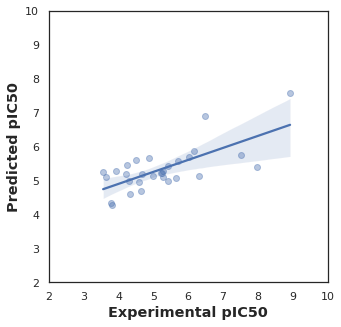

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(df_final_Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 10)
ax.set_ylim(2, 10)
ax.figure.set_size_inches(5, 5)
plt.show